<a href="https://colab.research.google.com/github/FauziRahmatFebrian/Scrapping-data/blob/main/Bahan_Praktik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('hallo semuanya kita akan mulai dengan scrapping data aplikasi internet daari google play store')

hallo semuanya kita akan mulai dengan scrapping data aplikasi internet daari google play store


##1. Scraping Data

In [ ]:
#instal google play scraper

!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.0 MB/s eta 0:00:00


In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np


In [ ]:
#mulai scraping data

from google_play_scraper import Sort, reviews

result, continuation_token = reviews (
    'com.spotify.music',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=1000,
    filter_score_with=None
)

In [ ]:
df_busu=pd.DataFrame(np.array(result),columns=['review'])

df_busu=df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,5a6f9c44-63ab-4d0d-b678-d2dc0cc31e5f,Bagas Pramana,https://play-lh.googleusercontent.com/a/ACg8oc...,"Padahal dulu gak banyak iklan, sekarang malah ...",2,424,8.9.94.470,2024-11-24 14:25:26,None,None,8.9.94.470
1,a5621289-94ac-4834-868c-f65e8ab656fb,KukiroOo,https://play-lh.googleusercontent.com/a-/ALV-U...,Sementara saya ksih bintang 3 dulu. Soalnya se...,3,132,8.9.94.470,2024-11-24 07:49:08,None,None,8.9.94.470
2,50c3212f-78d7-48e0-a81b-e6f47a48a67e,Emmanuelraynard,https://play-lh.googleusercontent.com/a-/ALV-U...,"agak kecewa dikit, walau ini mungkin lumayan s...",3,103,8.9.94.470,2024-11-21 10:59:13,None,None,8.9.94.470
3,fc0c4ae6-cd9a-4eb2-9a8e-b0b5a1360695,Muhammad Bayu,https://play-lh.googleusercontent.com/a/ACg8oc...,Sumpah ni aplikasi yang bener bener sekali cob...,5,191,8.9.94.470,2024-11-24 13:15:15,None,None,8.9.94.470
4,0993bdd6-2250-46e1-80ec-0899f224d7a1,Pelangi Tunggak Dewi Suprapto,https://play-lh.googleusercontent.com/a-/ALV-U...,Hadeh... Padahal dulu g ada iklan sekarang ikl...,2,74,8.9.94.470,2024-11-22 12:40:03,None,None,8.9.94.470


In [ ]:
len(df_busu.index)

1000

In [ ]:
df_busu[['userName','score','at','content']].head()

,userName,score,at,content
0,Bagas Pramana,2,2024-11-24 14:25:26,"Padahal dulu gak banyak iklan, sekarang malah ..."
1,KukiroOo,3,2024-11-24 07:49:08,Sementara saya ksih bintang 3 dulu. Soalnya se...
2,Emmanuelraynard,3,2024-11-21 10:59:13,"agak kecewa dikit, walau ini mungkin lumayan s..."
3,Muhammad Bayu,5,2024-11-24 13:15:15,Sumpah ni aplikasi yang bener bener sekali cob...
4,Pelangi Tunggak Dewi Suprapto,2,2024-11-22 12:40:03,Hadeh... Padahal dulu g ada iklan sekarang ikl...


In [ ]:
new_df = df_busu[['userName', 'score','at','content']]
sorted_df = new_df.sort_values(by='at', ascending=False)
sorted_df.head()

,userName,score,at,content
0,Bagas Pramana,2,2024-11-24 14:25:26,"Padahal dulu gak banyak iklan, sekarang malah ..."
797,ZULFAN SETO,2,2024-11-24 13:53:07,"gak masalah tentang jeda iklan,tapi yang palin..."
3,Muhammad Bayu,5,2024-11-24 13:15:15,Sumpah ni aplikasi yang bener bener sekali cob...
620,Ketut Julia,4,2024-11-24 11:20:45,"Spotify sangat seru untuk mendengarkan musik,m..."
618,Syauqie Arfa,5,2024-11-24 10:59:33,Bagus banget tapi Spotify tu bikin baterai hp ...


In [ ]:
my_df = sorted_df[['userName', 'score', 'at', 'content']]

my_df=my_df[['content', 'score']]

my_df.head()

,content,score
0,"Padahal dulu gak banyak iklan, sekarang malah ...",2
797,"gak masalah tentang jeda iklan,tapi yang palin...",2
3,Sumpah ni aplikasi yang bener bener sekali cob...,5
620,"Spotify sangat seru untuk mendengarkan musik,m...",4
618,Bagus banget tapi Spotify tu bikin baterai hp ...,5


##2. Labeling

In [ ]:
label = []
for index, row in my_df.iterrows():
  if row['score'] == 1 or row['score'] == 2:
    label.append(0)
  else :
    label.append(1)
my_df['label'] = label

In [ ]:
my_df.head()

,content,score,label
0,"Padahal dulu gak banyak iklan, sekarang malah ...",2,0
797,"gak masalah tentang jeda iklan,tapi yang palin...",2,0
3,Sumpah ni aplikasi yang bener bener sekali cob...,5,1
620,"Spotify sangat seru untuk mendengarkan musik,m...",4,1
618,Bagus banget tapi Spotify tu bikin baterai hp ...,5,1


In [ ]:
my_df.to_csv('data_mentah1.csv', index =False)

##3. Preprocessing

In [ ]:
#mengubah text menjadi lower
my_df["content"]=my_df["content"].str.lower()
my_df.head()

,content,score,label
0,"padahal dulu gak banyak iklan, sekarang malah ...",2,0
797,"gak masalah tentang jeda iklan,tapi yang palin...",2,0
3,sumpah ni aplikasi yang bener bener sekali cob...,5,1
620,"spotify sangat seru untuk mendengarkan musik,m...",4,1
618,bagus banget tapi spotify tu bikin baterai hp ...,5,1


3.1 Normalisasi
mengubah kata untuk memenuhi tujuan tersendiri contoh:
dgn : dengan
yg : yang
good : bagus

In [ ]:
norm = {'payment' : 'pembayaran', 'apk' : 'aplikasi', 'bgt' : 'banget', 'gx' : 'tidak', 'yg' : 'yang', 'sy' : 'saya', 'gw' : 'gue', 'klo' : 'kalau' }

def normalisasi (str_text) :
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text
my_df["content"] = my_df["content"].apply(lambda x: normalisasi(x))

In [ ]:
my_df.head()

,content,score,label
0,"padahal dulu gak banyak iklan, sekarang malah ...",2,0
797,"gak masalah tentang jeda iklan,tapi yang palin...",2,0
3,sumpah ni aplikasi yang bener bener sekali cob...,5,1
620,"spotify sangat seru untuk mendengarkan musik,m...",4,1
618,bagus banget tapi spotify tu bikin baterai hp ...,5,1


3.2 Stopwords

In [ ]:
#mengahpus kata yang memiliki informasi yang rendah
#yang, dan, di, dari dll.

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words =[]

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text) :
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

my_df ["content"] = my_df["content"].apply(lambda x : stopword(x))

my_df.head()

,content,score,label
0,"padahal dulu gak banyak iklan, sekarang malah ...",2,0
797,"gak masalah jeda iklan,tapi paling gak suka, d...",2,0
3,sumpah ni aplikasi bener bener sekali coba nge...,5,1
620,"spotify sangat seru mendengarkan musik,meneman...",4,1
618,bagus banget spotify tu bikin baterai hp ku ce...,5,1


#3.3 Tokenize

In [ ]:
tokenized = my_df["content"].apply(lambda x:x.split())
tokenized

,content
0,"[padahal, dulu, gak, banyak, iklan,, sekarang,..."
797,"[gak, masalah, jeda, iklan,tapi, paling, gak, ..."
3,"[sumpah, ni, aplikasi, bener, bener, sekali, c..."
620,"[spotify, sangat, seru, mendengarkan, musik,me..."
618,"[bagus, banget, spotify, tu, bikin, baterai, h..."
...,...
167,"[problem, nya, di, iklan,, padahal, dulu, ikla..."
363,"[aplikasi, ny, bagus, sih, sekarang, kalo, pen..."
452,"[pas, pertama, download, aplikasi, puas, bange..."
729,"[sekarang, spotify, kayak, maksa, penggunanya,..."


##4 STEMMING

In [ ]:
#digunakan untuk memperkecil jumlah index yang berbeda dari satu data sehingga sebuah kata yang memiliki suffix maupun prefix akan kembali ke bentuk dasarnya

In [ ]:
#contoh : pesanan ---> pesan, membeli --> beli

In [ ]:
 from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(Ulasan):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in Ulasan:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv('databersih2.csv', index=False)
data_clean = pd.read_csv('databersih2.csv', encoding='latin1')
data_clean.head()



padahal dulu gak banyak iklan sekarang malah banyak iklan apa premium coba maksain banget buat beli premium jujur update udah males pake spotify mau ngulang ganti lagu gak karena premium dulu njir males bet gue
gak masalah jeda iklan tapi paling gak suka suruh suruh premium
sumpah ni aplikasi bener bener sekali coba ngerasain ujicoba pakai premium guna baru ngedownload musik podcast gratis saat masa ujicoba premium fikssssss no komen aplikasi dengar music populer panjang masa poko buat kalian mau fomo kayak gue bisa langsung download
spotify sangat seru dengar musik tani aku kapan di mana
bagus banget spotify tu bikin baterai hp ku cepet habis kualitas bagus banget
lumayan cma banyak iklan aja si wkwkwkwkwkwk lebih oke oke aja bagusss
sudah 2 kali beli paket premium mini di akun spotify tidak terang spotify paket mini aktif saldo shopeepay sudah potong lalu googleplay
ksih bintang 3 dulu soal mau play lagu keluar aplikasi sebut lagu tiba henti sendiri paksa saya masuk aplikasi nya lgi 

,content
0,padahal dulu gak banyak iklan sekarang malah b...
1,gak masalah jeda iklan tapi paling gak suka su...
2,sumpah ni aplikasi bener bener sekali coba nge...
3,spotify sangat seru dengar musik tani aku kapa...
4,bagus banget spotify tu bikin baterai hp ku ce...


#Menggabungkan dua atribut

In [ ]:
at1 = pd.read_csv('databersih2.csv')
at2 = pd.read_csv('data_mentah1.csv')
att2 =at2['label']

result =pd.concat([at1,att2], axis=1)

FileNotFoundError: [Errno 2] No such file or directory: 'databersih2.csv'

In [ ]:
result.head()

,content,label
0,sangat untung sekali belanja diblibli,1
1,kecewa benar kecewa sekali tarik dana bliblipa...,0
2,kecewa belanja blibli,0
3,apikasi belanja transaksiny lumayan komplit,1
4,tolak terus paylater nya,0


##5. menghitung Kata dengan TF-IDF

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
Ulasan = result ['content']

TypeError: list indices must be integers or slices, not str

In [ ]:
Ulasan.isnull().sum()

0

In [ ]:
Ulasan = Ulasan.fillna('tidak ada komentar')

In [ ]:
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print(len(term_fit.vocabulary_))

3635


In [ ]:
term_fit.vocabulary_

{'sangat': 2885,
 'untung': 3504,
 'sekali': 2955,
 'belanja': 461,
 'diblibli': 896,
 'kecewa': 1625,
 'benar': 473,
 'tarik': 3255,
 'dana': 820,
 'bliblipay': 575,
 'bank': 402,
 'lot': 1934,
 'butuh': 669,
 'waktu': 3568,
 'hari': 1324,
 'cair': 686,
 'itu': 1453,
 'kalo': 1577,
 'gak': 1170,
 'kembali': 1648,
 'dan': 819,
 'ulang': 3484,
 'saldo': 2860,
 'rek': 2763,
 'nunggu': 2348,
 'lagi': 1814,
 'app': 297,
 'buruk': 664,
 'blibli': 567,
 'apikasi': 287,
 'transaksiny': 3416,
 'lumayan': 1947,
 'komplit': 1736,
 'tolak': 3393,
 'terus': 3320,
 'paylater': 2509,
 'nya': 2352,
 'udh': 3473,
 'sering': 3015,
 'nukerin': 2344,
 'kupon': 1794,
 'ampe': 244,
 '100': 4,
 'lbh': 1869,
 'ga': 1154,
 'pernah': 2572,
 'hany': 1310,
 'gimiick': 1226,
 'moga': 2146,
 'makin': 1978,
 'kembang': 1650,
 'min': 2113,
 'saja': 2856,
 'promo': 2680,
 'saya': 2899,
 'maksud': 1981,
 'wkwk': 3603,
 'notifikasi': 2334,
 'cekal': 721,
 'aja': 181,
 'muncul': 2175,
 'isi': 1445,
 'kartu': 1598,
 'bri

In [ ]:
term_frequency_all = term_fit.transform(Ulasan)
print(term_frequency_all)

#kolom kedua ialah jumlah dokumen
#kolom kedua ialah letak kata
#Kolom ketiga berarti hasil dari transform

  (0, 461)	1
  (0, 896)	1
  (0, 2885)	1
  (0, 2955)	1
  (0, 3504)	1
  (1, 297)	1
  (1, 402)	1
  (1, 473)	2
  (1, 575)	2
  (1, 664)	1
  (1, 669)	1
  (1, 686)	3
  (1, 819)	1
  (1, 820)	1
  (1, 1170)	1
  (1, 1324)	2
  (1, 1453)	1
  (1, 1577)	2
  (1, 1625)	2
  (1, 1648)	1
  (1, 1814)	1
  (1, 1934)	1
  (1, 2348)	1
  (1, 2763)	1
  (1, 2860)	1
  :	:
  (999, 181)	1
  (999, 205)	1
  (999, 297)	1
  (999, 415)	2
  (999, 473)	1
  (999, 538)	1
  (999, 552)	1
  (999, 811)	1
  (999, 1054)	1
  (999, 1131)	1
  (999, 1170)	2
  (999, 1390)	1
  (999, 1416)	1
  (999, 1423)	1
  (999, 1593)	1
  (999, 1844)	1
  (999, 2036)	1
  (999, 2041)	1
  (999, 2180)	1
  (999, 2307)	1
  (999, 2751)	1
  (999, 2858)	2
  (999, 3327)	1
  (999, 3408)	1
  (999, 3499)	1


In [ ]:
Ulasan_tf = Ulasan[1]
print(Ulasan_tf)

kecewa benar kecewa sekali tarik dana bliblipay bank sangat lot sekali butuh waktu 3 hari cair itu kalo cair kalo gak cair kembali bliblipay dan ulang tarik saldo rek nunggu 3 hari lagi benar app buruk sekali


In [ ]:
term_frequency = term_fit.transform([Ulasan_tf])
print(term_frequency)

  (0, 297)	1
  (0, 402)	1
  (0, 473)	2
  (0, 575)	2
  (0, 664)	1
  (0, 669)	1
  (0, 686)	3
  (0, 819)	1
  (0, 820)	1
  (0, 1170)	1
  (0, 1324)	2
  (0, 1453)	1
  (0, 1577)	2
  (0, 1625)	2
  (0, 1648)	1
  (0, 1814)	1
  (0, 1934)	1
  (0, 2348)	1
  (0, 2763)	1
  (0, 2860)	1
  (0, 2885)	1
  (0, 2955)	3
  (0, 3255)	2
  (0, 3484)	1
  (0, 3568)	1


In [ ]:
dokumen = term_fit.transform(Ulasan)
tfidf_transformer = TfidfTransformer().fit(dokumen)
print(tfidf_transformer.idf_)

tfidf = tfidf_transformer.transform(term_frequency)
print(tfidf)


[6.81014249 6.11699531 7.2156076  ... 6.29931687 7.2156076  7.2156076 ]
  (0, 297)	0.1352623846242855
  (0, 402)	0.16413491930628563
  (0, 473)	0.26282790922344557
  (0, 575)	0.33394725740822406
  (0, 664)	0.13052481677545022
  (0, 669)	0.1272120829592427
  (0, 686)	0.5009208861123361
  (0, 819)	0.12568436832139024
  (0, 820)	0.11903828185423129
  (0, 1170)	0.08476975320045613
  (0, 1324)	0.20175416326425138
  (0, 1453)	0.12800636751280361
  (0, 1577)	0.21082876678363408
  (0, 1625)	0.1874349336595627
  (0, 1648)	0.11461775443292463
  (0, 1814)	0.11311572664927155
  (0, 1934)	0.14785671315060359
  (0, 2348)	0.1235303765641132
  (0, 2763)	0.19426434536263187
  (0, 2860)	0.1235303765641132
  (0, 2885)	0.08347860776184202
  (0, 2955)	0.31182982268955817
  (0, 3255)	0.24846241335530778
  (0, 3484)	0.14632899851275116
  (0, 3568)	0.11311572664927155


##6. Visualisasi / Natural Language Proccessing (NLP)

In [ ]:
train_s0 =my_df[my_df["label"] ==0]

In [ ]:
train_s0["content"] = train_s0["content"].fillna("tidak ada komentar")

<ipython-input-65-2482b822a91c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["content"] = train_s0["content"].fillna("tidak ada komentar")


In [ ]:
train_s0["content"] = train_s0["content"].fillna("tidak ada komentar")

,content,score,label
0,mengecewakan benar² mengecewakan sekali tarik ...,1,0
660,kecewa belanja blibli,1,0
831,👎 tolak terus paylater nya 🤬,1,0
207,notifikasi dicekal aja muncul,1,0
7,isi saldo kartu brizzi sebesar 50k via blibli ...,1,0


In [ ]:
from wordcloud import WordCloud

<function matplotlib.pyplot.show(close=None, block=None)>

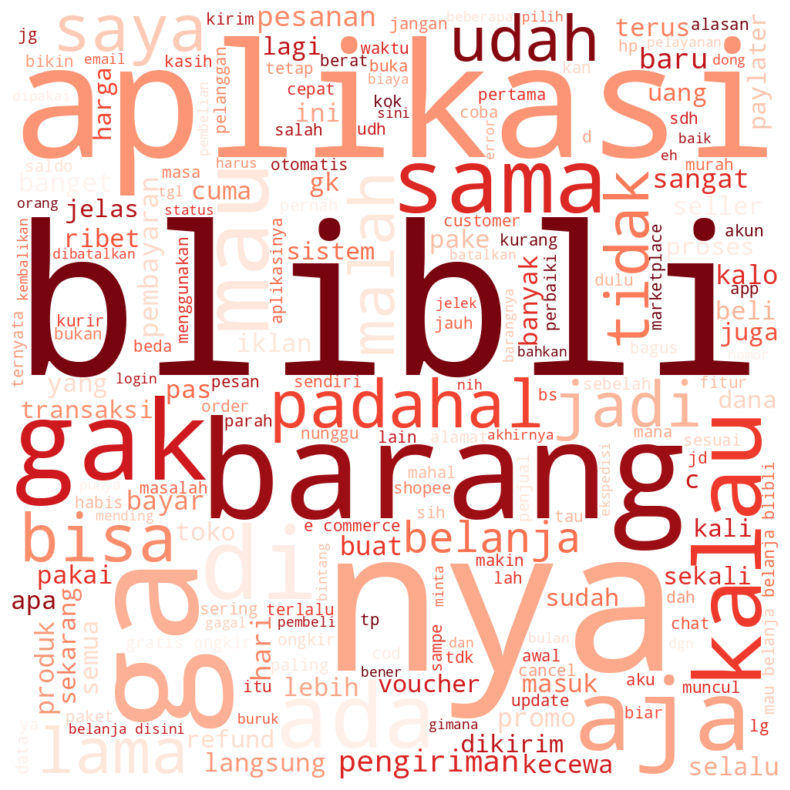

In [ ]:
all_text_s0 = ' '.join(word for word in train_s0["content"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA',background_color='white').generate(all_text_s0)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show

In [ ]:
train_s1 = my_df[my_df["label"] == 1]

In [ ]:
train_s1["content"] = train_s1["content"].fillna("Tidak ada komentar")

<ipython-input-70-350f223df599>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["content"] = train_s1["content"].fillna("Tidak ada komentar")


In [ ]:
train_s1.head()

,content,score,label
718,sangat menguntungkan sekali berbelanja diblibli,5,1
170,apikasi belanja transaksiny lumayan komplit. 👍,4,1
754,udh sering nukerin kupon ampe 100 lbh ga perna...,5,1
764,"semoga makin berkembang min, saja ""promo nya"" ...",5,1
815,"kecewa masalah pake paylaternya,masa kalo tagi...",3,1


<function matplotlib.pyplot.show(close=None, block=None)>

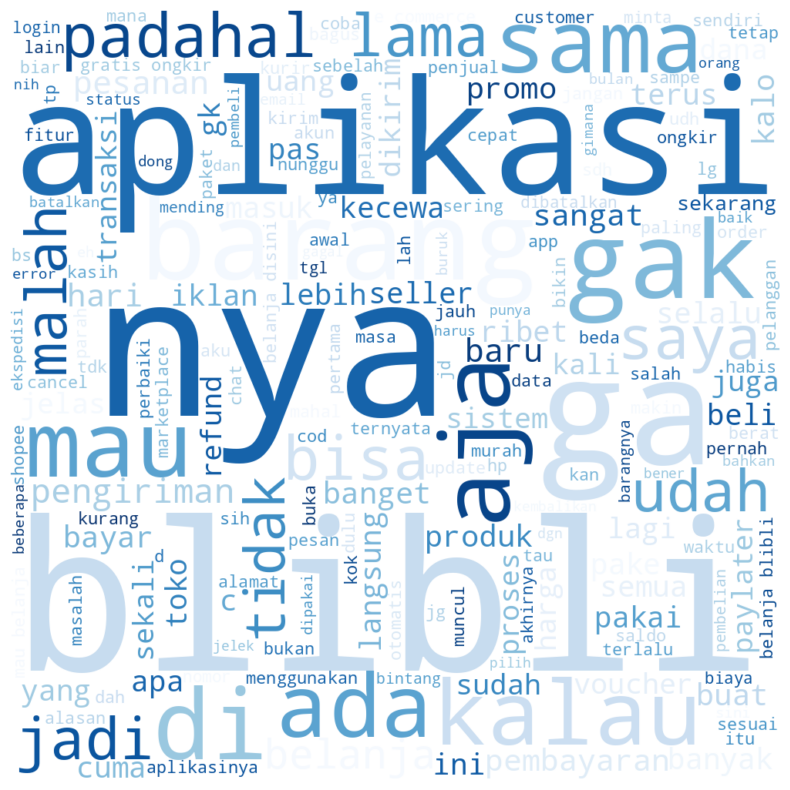

In [ ]:
all_text_s1 = ' '.join(word for word in train_s1["content"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA',background_color='white').generate(all_text_s0)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show

<ipython-input-73-d23478a15687>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  sentimen_data = pd.value_counts(my_df["label"], sort=True)


<function matplotlib.pyplot.show(close=None, block=None)>

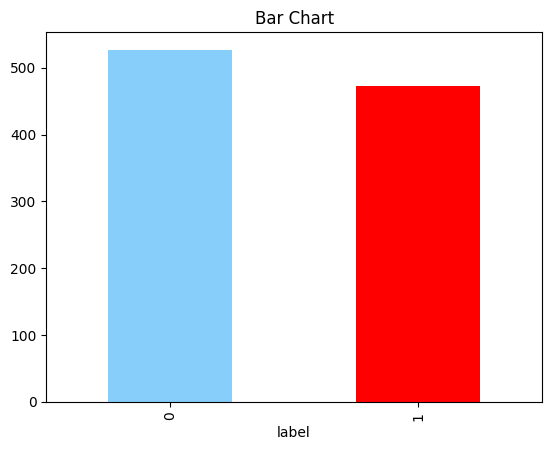

In [ ]:
sentimen_data = pd.value_counts(my_df["label"], sort=True)
sentimen_data.plot(kind='bar', color=['lightskyblue', 'red'])
plt.title("Bar Chart")
plt.show

##7. Split Data


In [ ]:
#link video :

In [ ]:
result['content'] = result['content'].fillna("Tidak ada komentar")

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(result['content'], result['label'],
                                                    test_size=0.1, stratify=result['label'], random_state=30)


In [ ]:
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [ ]:
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(900, 3468)
(100, 3468)


In [ ]:
x_train = x_train.toarray()

In [ ]:
x_test = x_test.toarray()

#Naive Bayes Classifier


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb =GaussianNB()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

params_NB = {'var_smoothing': np.logspace(0, -9, num=100)}
gscv_nb = GridSearchCV(estimator=nb,
                        param_grid=params_NB,
                        cv = cv_method,
                        verbose = 1,
                        scoring = 'accuracy')
gscv_nb.fit(x_train, y_train)
gscv_nb.best_params_

NameError: name 'np' is not defined

In [ ]:
nb = GaussianNB(var_smoothing=0.533669923120631)

In [ ]:
nb.fit(x_train, y_train)

GaussianNB(var_smoothing=0.533669923120631)

In [ ]:
y_pred_nb = nb.predict(x_test)



```
# This is formatted as code
```

##Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve
import matplotlib.pyplot as plt

In [ ]:
print ('===== confusion matrix ====')
print(confusion_matrix(y_test, y_pred_nb))


print('==== classification report ====')
print(classification_report(y_test, y_pred_nb))

===== confusion matrix ====
[[28 25]
 [ 6 41]]
==== classification report ====
              precision    recall  f1-score   support

           0       0.82      0.53      0.64        53
           1       0.62      0.87      0.73        47

    accuracy                           0.69       100
   macro avg       0.72      0.70      0.68       100
weighted avg       0.73      0.69      0.68       100

